In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
covid_df=pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
covid_df.Zip = covid_df.Zip.astype('Int64')
covid_df.Zip = covid_df.Zip.astype('str')

In [45]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8832 non-null   object
 1   zip     8832 non-null   object
 2   cases   8832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 207.1+ KB


In [46]:
covid_df.rename(columns = {'Specimen Collection Date': 'date', 'Zip': 'zip', 'Cases': 'cases'}, inplace = True)

In [47]:
covid_df.head(10)

,date,zip,cases
0,3/6/2020,37217,1
1,3/10/2020,37214,1
2,3/11/2020,37013,1
3,3/11/2020,37204,2
4,3/11/2020,37205,1
5,3/11/2020,37210,1
6,3/11/2020,37212,2
7,3/11/2020,37214,1
8,3/11/2020,37215,3
9,3/12/2020,<NA>,1


In [48]:
covid_df.tail()

,date,zip,cases
8827,3/27/2021,37210,1
8828,3/27/2021,37211,1
8829,3/27/2021,37212,1
8830,3/27/2021,37214,2
8831,3/27/2021,37221,2


In [49]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8832 non-null   object
 1   zip     8832 non-null   object
 2   cases   8832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 207.1+ KB


In [50]:
covid_df.zip = covid_df.zip.astype('str')

In [51]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8832 non-null   object
 1   zip     8832 non-null   object
 2   cases   8832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 207.1+ KB


In [ ]:
#sorted by number of cases in zip code descending

In [52]:
case_by_zip = covid_df.groupby("zip", as_index = False).sum()


In [53]:
case_by_zip

,zip,cases
0,37013,13354
1,37027,231
2,37069,16
3,37072,2984
4,37076,4279
5,37080,574
6,37115,4574
7,37138,2359
8,37189,479
9,37201,299


In [54]:
case_by_zip = case_by_zip.sort_values('cases', ascending=False)

In [55]:
case_by_zip

,zip,cases
0,37013,13354
18,37211,10233
31,<NA>,8412
16,37209,5072
14,37207,4729
6,37115,4574
4,37076,4279
28,37221,3910
24,37217,3907
21,37214,3508


In [84]:
# cases grouped by number of cases per date
case_by_date = covid_df.groupby("date", as_index = False).sum()
case_by_date
case_by_date['date'] = pd.to_datetime(case_by_date['date'])
case_by_date

,date,cases
0,2021-01-01,178
1,2021-01-10,254
2,2021-01-11,530
3,2021-01-12,500
4,2021-01-13,647
...,...,...
379,2020-09-05,51
380,2020-09-06,41
381,2020-09-07,36
382,2020-09-08,122


In [93]:
case_by_date_sort = case_by_date.sort_values('cases', ascending = False)
case_by_date_sort
case_by_date_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 25 to 196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    384 non-null    datetime64[ns]
 1   cases   384 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 KB


In [80]:
case_by_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    384 non-null    datetime64[ns]
 1   cases   384 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 KB


In [104]:
import matplotlib.dates as mdates


we are working to put vertical lines in the graph below to represent major holidays to see if there is a correlation between holidays and covid cases

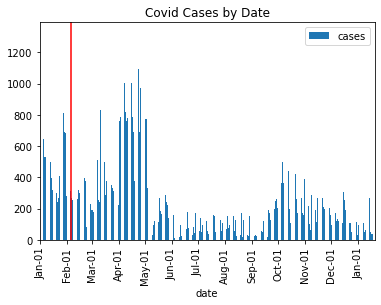

In [105]:
ax = case_by_date.plot.bar(x = 'date', y = 'cases', title = 'Covid Cases by Date')
#plt.axvline(dt.datetime(2012, 9, 21))

plt.axvline(x = 35, color = 'r')
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'));


In [58]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx', skiprows = 1, header=[0, 1], sheet_name = 0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)


Reading in vaccine data:

In [42]:
vaccine_df = pd.read_csv('../data/vaccine_with_protocol.csv')

In [43]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [34]:
vaccine_df.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


reading in ethnicity data:


In [35]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx')

In [36]:
ethnicity_df.head()

,B03002,Hispanic or Latino Origin by Race,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236
0,NaN,37010,NaN,37012,NaN,37013,NaN,37014,NaN,37015,...,38552,NaN,38560,NaN,38563,NaN,38567,NaN,38569,NaN
1,NaN,Value,Error,Value,Error,Value,Error,Value,Error,Value,...,Value,Error,Value,Error,Value,Error,Value,Error,Value,Error
2,Total:,4966,647,2185,338,97939,2456,2835,382,17665,...,157,86,1405,243,3410,459,685,288,69,48
3,Not Hispanic or Latino:,4803,638,2134,321,81131,2548,2783,376,16768,...,157,86,1405,243,3410,459,660,291,69,48
4,White alone,4502,664,2050,321,40080,1792,2682,374,15842,...,157,86,1307,248,3202,466,615,286,69,48


In [50]:
ethnicity_df = pd.read_excel('..\data\ethnicity_zip.xlsx', skiprows = 1, header=[0, 1], sheet_name = 0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)


In [51]:
ethnicity_df.head()

,Unnamed: 0_level_0,37010,37012,37013,37014,37015,37016,37020,37022,37025,...,38482,38483,38487,38547,38548,38552,38560,38563,38567,38569
0,Total:,4966,2185,97939,2835,17665,950,5984,6583,5698,...,1635,5910,1044,1939,931,157,1405,3410,685,69
1,Not Hispanic or Latino:,4803,2134,81131,2783,16768,944,5824,6286,5698,...,1574,5748,1022,1912,931,157,1405,3410,660,69
2,White alone,4502,2050,40080,2682,15842,939,5137,5968,5526,...,1525,5608,838,1884,930,157,1307,3202,615,69
3,Black or African American alone,245,73,33280,18,304,0,222,173,24,...,0,31,113,0,0,0,0,140,0,0
4,American Indian and Alaska Native alone,2,0,95,0,147,0,99,32,0,...,0,0,0,28,1,0,2,0,0,0


In [52]:
ethnicity_df.dtypes

Unnamed: 0_level_0    object
37010                  int64
37012                  int64
37013                  int64
37014                  int64
                       ...  
38552                  int64
38560                  int64
38563                  int64
38567                  int64
38569                  int64
Length: 119, dtype: object

In [ ]:
# code for making a line in a graph
#plt.annotate(s = 'overweight', xy = (1, 25.5))
#plt.annotate(s = 'obese', xy = (1, 30.5))
